In [ ]:
import cv2
import numpy as np


In [ ]:
src = cv2.imread('./data/heart10.jpg', cv2.IMREAD_GRAYSCALE)
ret, dst = cv2.threshold(src, 120, 255, cv2.THRESH_BINARY)
print('ret=', ret)

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
import cv2
import numpy as np

src = cv2.imread('./data/heart10.jpg', cv2.IMREAD_GRAYSCALE)
ret, dst = cv2.threshold(src, 120, 255, cv2.THRESH_BINARY)
ret2, dst2 = cv2.threshold(src, 200, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU) # 200 은 otsu로 계산해서 아무 의미 없다
print('threshold=', ret2)

cv2.imshow('dst', dst) #128로 임계값을  정했을때
cv2.imshow('dst2', dst2) #OTSU로 임계값을 정했을떄 _ OTSU가 좀 깔끔
cv2.waitKey()
cv2,destroyAllWindows()

In [ ]:
import cv2
import numpy as np
src2=cv2.imread('./data/srcThreshold.png',cv2.IMREAD_GRAYSCALE)
ret,dst3=cv2.threshold(src2,128,255,cv2.THRESH_BINARY)
ret4,dst4=cv2.threshold(src2,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print('threshold=',ret4)

#적응형 이진화 
#MEAN_C = 
#51 = 블럭사이즈, 블럭의 크기를 몇개로 나누겠다, 7= 상수를 7정도로 하겠다_ 파라미터 튜닝은 연습을 좀 해야함
dst5=cv2.adaptiveThreshold(src2,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,51,7)
#GAUSSIAN_C = 
dst6=cv2.adaptiveThreshold(src2,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,51,7)

cv2.imshow('src2',src2)
cv2.imshow('dst3',dst3)
cv2.imshow('dst4',dst4)
cv2.imshow('dst5',dst5)
cv2.imshow('dst6',dst6)
cv2.waitKey()
cv2.destroyAllWindows()

In [3]:
#Histogram calculation
import cv2
import numpy as np
from matplotlib import pyplot as plt
#Gray level은 0~7까지 있음
src = np.array([[0,0,0,0],
                [1,1,3,5],
                [5,1,1,3],
                [4,3,1,7]
               ], dtype=np.uint8)
#이미지 넣고 채널은 1개 짜리 이므로 0
#mask는 원하는 영역은 값이 있고 나머지 영역이 0으로 채워져있는 이미지를 넣었을 경우 (ex_roi)
#range는 0부터 7까지 다 쓸거기 떄문에 0,8  ( 01의 개수, 23, 45, 67 )
hist1 = cv2.calcHist(images=[src], channels=[0], mask=None,
                     histSize=[4], ranges=[0,8])
print('hist1=', hist1)
print(hist1.shape)
#레벨을 0부터 4까지만 쓰곘다 ( 0의 개수,1,2,3 )
hist2 = cv2.calcHist(images=[src], channels=[0], mask=None,
                     histSize=[4], ranges=[0,4])
print('hist2=', hist2)
print(hist2.shape)

hist1= [[9.]
 [3.]
 [3.]
 [1.]]
(4, 1)
hist2= [[4.]
 [5.]
 [0.]
 [3.]]
(4, 1)


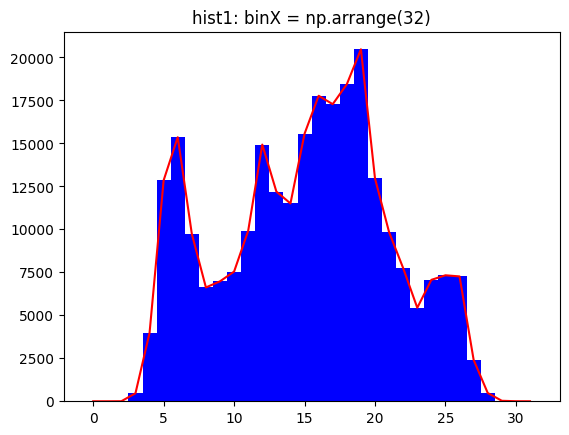

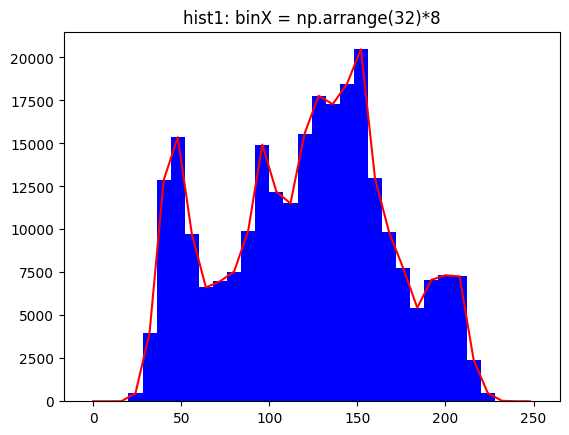

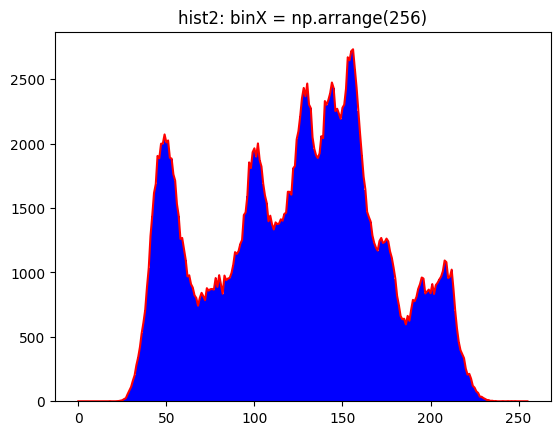

In [8]:
#히스토그램을 계산해서 보여줌
import cv2
import numpy as np
from matplotlib import pyplot as plt

src=cv2.imread('./data/lena.jpg', cv2.IMREAD_GRAYSCALE)
hist1=cv2.calcHist(images=[src], channels=[0], mask=None,
                     histSize=[32], ranges=[0,256])
hist2=cv2.calcHist(images=[src], channels=[0], mask=None,
                     histSize=[256], ranges=[0,256])

#1
hist1 = hist1.flatten()
hist2 = hist2.flatten()

#2
plt.title('hist1: binX = np.arrange(32)')
plt.plot(hist1, color='r')
binX = np.arange(32)
plt.bar(binX, hist1, width=1, color='b')
plt.show()

#3
plt.title('hist1: binX = np.arrange(32)*8')
binX = np.arange(32)*8
plt.plot(binX, hist1, color='r')
plt.bar(binX, hist1, width=8, color='b')
plt.show()

#4_ 빈의 개수가 256이기 때문에 거칠게 나옴.
#32일 때랑 256일 때랑 대충 모양은 비슷함 (같은 영상이기 때문)
#주로 노이즈를 줄이고 싶을 때 빈사이즈를 줄임
plt.title('hist2: binX = np.arrange(256)')
plt.plot(hist2, color='r')
binX = np.arange(256)
plt.bar(binX, hist2, width=1, color='b')
plt.show()

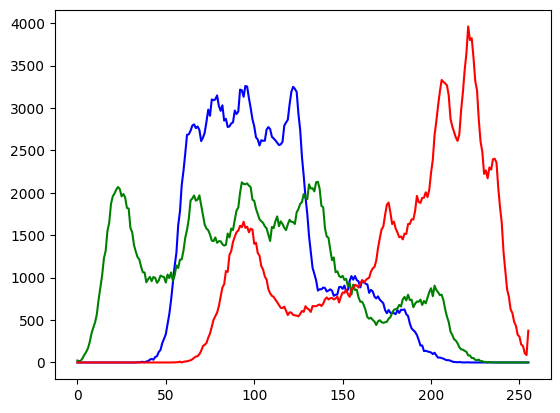

In [9]:
#색깔별로 칼라영상을 히스토그램으로 그릴 수 있다.
import cv2
import numpy as np
from matplotlib import pyplot as plt

src=cv2.imread('./data/lena.jpg')
hisColor = ('b','g','r')
for i in range(3):
    hist = cv2.calcHist(images=[src], channels=[i], mask=None,
                     histSize=[256], ranges=[0,256])
    plt.plot(hist, color = hisColor[i])
plt.show()

#결과를 보면 대충 영상이 어떨 영상일지 예측이 가능
#빨간색이 뒤쪽에 위치 -> 이미지 자체가 붉은 빛을 낼 것이다.